# Massage YNDX Data
### Short notebook used to do some massaging of the YNDX-data
Not necessary to use to get this repo to work

In [0]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [0]:
BASE_URL = '/content/drive/My Drive/NTNU/6. Semester/NEURO140/Data/1M/YNDX'
f15 = 'YNDX_150101_151231.csv'
f16 = 'YNDX_160101_161231.csv'

In [8]:
filepath15 = os.path.join(BASE_URL, f15)
df15 = pd.read_csv(filepath15)
filepath16 = os.path.join(BASE_URL, f16)
df16 = pd.read_csv(filepath16)
df16.head()
# (df15['close'].iloc[-1] - df15['open'].iloc[0]) / df15['open'].iloc[0]

,<DATE>,<TIME>,open,high,low,close,Volume
0,20160104,100100,1148.9,1148.9,1148.9,1148.9,0
1,20160104,100200,1148.9,1148.9,1148.9,1148.9,50
2,20160104,100300,1149.0,1149.0,1149.0,1149.0,33
3,20160104,100400,1149.0,1149.0,1149.0,1149.0,4
4,20160104,100500,1153.0,1153.0,1153.0,1153.0,0


In [0]:
import datetime
print(datetime.datetime.fromtimestamp(1585526400))
print(datetime.datetime.fromtimestamp(1585612800))

2020-03-30 00:00:00
2020-03-31 00:00:00


In [0]:
cum_vol = 0
cum_pv = 0
last_day = None

for index, row in df16.iterrows():
    curr_day = str(int(row['<DATE>']))[-1]
    if curr_day != last_day:
        last_day = curr_day
        cum_vol = 0
        cum_pv = 0

    pv = sum(row[['high', 'low', 'close']]) / 3

    cum_vol += row['Volume']
    cum_pv += pv * row['Volume']

    if cum_vol == 0:
        vwap = 0
    else:
        vwap = cum_pv / cum_vol

    if index % 1000 == 0:
        print(f"Doing index {index}, vwap {vwap} cum_vol {cum_vol}")
    if (index + 1) % 2000 == 0:
        pass

    df16.at[index, 'vwap'] = vwap



Doing index 0, vwap 0 cum_vol 0.0
Doing index 1000, vwap 1101.5241259542338 cum_vol 36373.0
Doing index 2000, vwap 1044.7976884313089 cum_vol 67602.0
Doing index 3000, vwap 1013.4842308822089 cum_vol 20426.0
Doing index 4000, vwap 987.331942068993 cum_vol 33327.0
Doing index 5000, vwap 977.5421746845589 cum_vol 40763.0
Doing index 6000, vwap 946.6283819868751 cum_vol 51555.0
Doing index 7000, vwap 1012.773151952766 cum_vol 25067.0
Doing index 8000, vwap 1030.4031219701383 cum_vol 18909.0
Doing index 9000, vwap 1018.9546364844344 cum_vol 14048.0
Doing index 10000, vwap 1033.1534148827727 cum_vol 12753.0
Doing index 11000, vwap 1023.1902641733453 cum_vol 5615.0
Doing index 12000, vwap 1030.280232325081 cum_vol 38251.0
Doing index 13000, vwap 985.0808289758473 cum_vol 34806.0
Doing index 14000, vwap 990.5016976630369 cum_vol 32692.0
Doing index 15000, vwap 1006.8998277685121 cum_vol 30579.0
Doing index 16000, vwap 1069.7636805381705 cum_vol 51929.0
Doing index 17000, vwap 1006.44152698381

In [0]:
df16.head(n=100)

,<DATE>,<TIME>,open,high,low,close,Volume,vwap
0,20160104,100100,1148.9,1148.9,1148.9,1148.9,0,0.000000
1,20160104,100200,1148.9,1148.9,1148.9,1148.9,50,1148.900000
2,20160104,100300,1149.0,1149.0,1149.0,1149.0,33,1148.939759
3,20160104,100400,1149.0,1149.0,1149.0,1149.0,4,1148.942529
4,20160104,100500,1153.0,1153.0,1153.0,1153.0,0,1148.942529
...,...,...,...,...,...,...,...,...
95,20160104,113600,1137.9,1137.9,1137.8,1137.8,75,1144.936120
96,20160104,113700,1139.9,1140.0,1139.9,1140.0,19,1144.877908
97,20160104,113800,1136.6,1136.6,1136.6,1136.6,0,1144.877908
98,20160104,113900,1136.6,1136.6,1136.6,1136.6,0,1144.877908


In [0]:
f15 = 'YNDX_15_alt.csv'
f16 = 'YNDX_16_alt.csv'

filepath15 = os.path.join(BASE_URL, f15)
df15.to_csv(filepath15)

filepath16 = os.path.join(BASE_URL, f16)
df16.to_csv(filepath16)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

In [0]:
import random
small_df1 = df16.iloc[random.sample(df16.index.values.tolist(), 60)]
small_df2 = df16.iloc[random.sample(df16.index.values.tolist(), 60)]

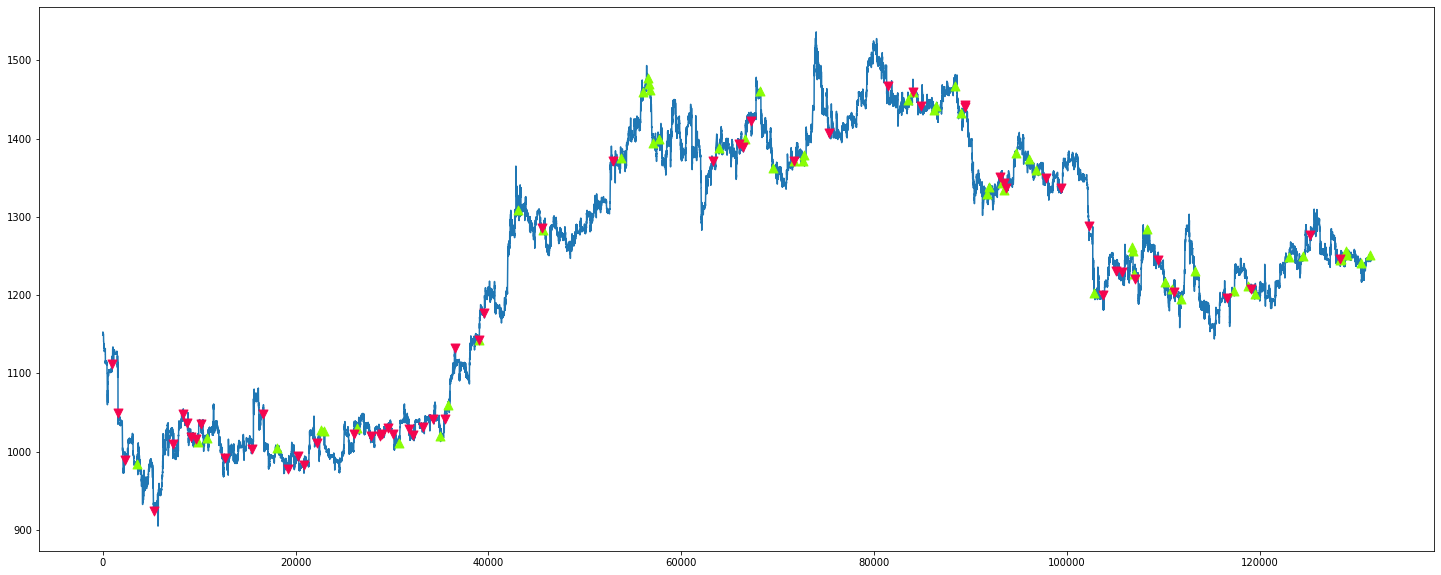

In [0]:

plt.plot(df16['close'], zorder=-100000)
plt.scatter(small_df1.index.values.tolist(), small_df1['close'], marker='^', color='xkcd:lime green', s=80)
plt.scatter(small_df2.index.values.tolist(), small_df2['close'], marker='v', color='xkcd:pink red', s=80)
plt.show();

In [0]:
df15.shape[0] + df16.shape[0]

262108